# KickStater Project

## Load dataset

In [1]:
import pandas as pd 

data = pd.read_csv('mapkickstarter/MasterKickstarter.csv')
data.head()

,Unnamed: 0,X1,X1_1,Country,City,id,name,blurb,goal,pledged,...,Backers_as_Prct_of_Pop_YM,Backers_as_Prct_of_Pop_Y,Days_spent_making_campign,Days_inception_to_Deadline,Backers_in_city_Y,Backers_in_city_YM,All_Time_Backers_city,Mean_Pledge_City,Mean_pledge_city_Y,Mean_pledge_city_YM
0,1,1,1,AUS,Adelaide,1337161279,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,5000.0,16081.00,...,0.020015,0.044034,21,59,473,215,1672,3124.0,2975.532222,215.0
1,2,2,2,AUS,Adelaide,1533913565,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",5500.0,257.00,...,0.000465,0.044034,22,62,473,5,1672,3124.0,2975.532222,2.5
2,3,3,3,AUS,Adelaide,1666009607,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,300.0,353.12,...,0.000838,0.000931,3,48,10,9,1672,3124.0,94.440000,4.5
3,4,4,4,AUS,Adelaide,1759296231,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,5000.0,90.00,...,0.000279,0.044034,84,144,473,3,1672,3124.0,2975.532222,3.0
4,5,5,5,AUS,Adelaide,458085213,School of the Road: Autism and Adventure Docum...,A feature length documentary and educational s...,100000.0,16272.56,...,0.009310,0.044034,68,103,473,100,1672,3124.0,2975.532222,100.0


## Generate correlation map, analyze feature correlations to reduce feature 

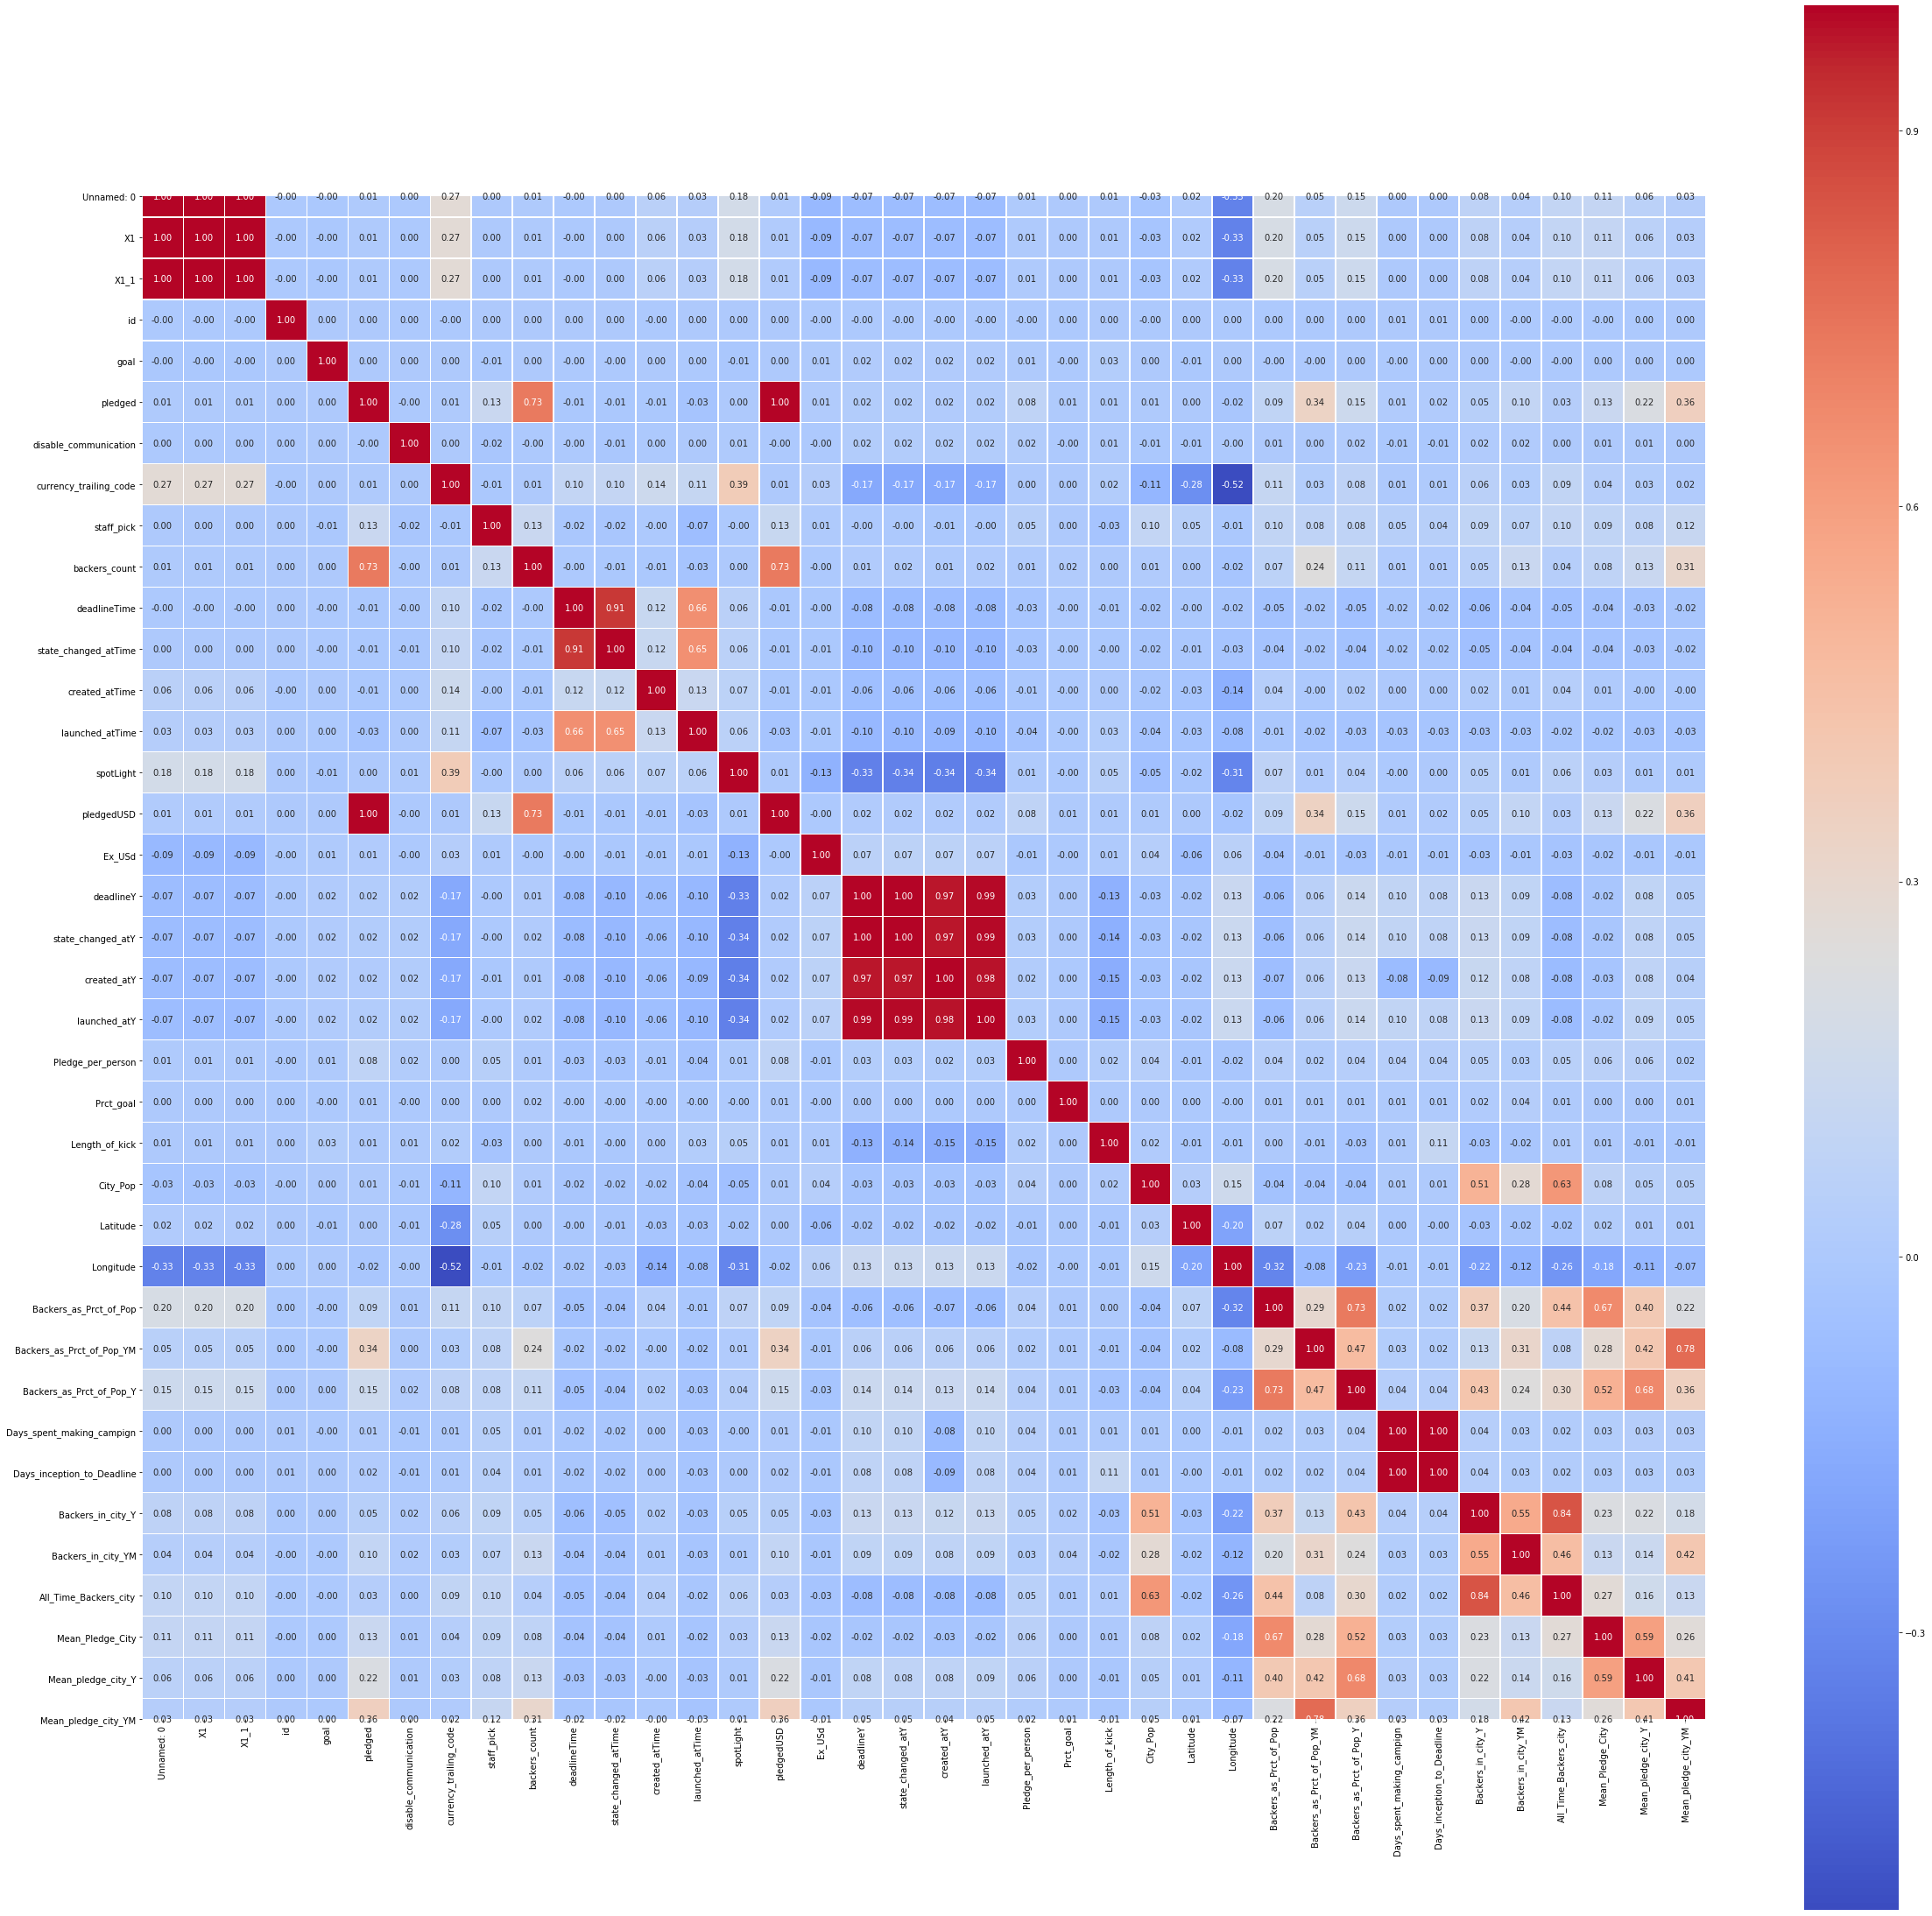

In [2]:
data.fillna(0)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


plt.figure(figsize=(40, 40)) 
corr = data.corr()
h1 = sns.heatmap(corr, square=True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm')
plt.savefig("h1.png")

In [3]:
data1 = data.drop(['Unnamed: 0', 'X1', 'X1_1', 'disable_communication', 'currency', 'currency_symbol', 'currency_trailing_code', 'id','deadline', 'state_changed_at', 'created_at','launched_at', 'pledged', 'pledgedUSD', 'Prct_goal', 'Backers_as_Prct_of_Pop', 'Backers_as_Prct_of_Pop_YM', 'Backers_as_Prct_of_Pop_Y', 'Days_inception_to_Deadline','deadlineTime','state_changed_atTime', 'created_atTime', 'launched_atTime',
       'state_changed_atY', 'created_atY', 'launched_atY', 'deadlineYM', 'state_changed_atYM', 'created_atYM', 'launched_atYM', 'Mean_pledge_city_Y', 'Mean_pledge_city_YM', 'Backers_in_city_YM', 'Backers_in_city_Y'], axis = 1)

In [4]:
data1['goal_USD'] = data1['goal'] / data1['Ex_USd']

data1 = data1.drop(['goal', 'Ex_USd'], axis = 1)

In [5]:
data1.columns

Index(['Country', 'City', 'name', 'blurb', 'status', 'slug', 'staff_pick',
       'backers_count', 'Categories', 'spotLight', 'deadlineY',
       'Pledge_per_person', 'Length_of_kick', 'City_Pop', 'Latitude',
       'Longitude', 'County', 'State', 'Days_spent_making_campign',
       'All_Time_Backers_city', 'Mean_Pledge_City', 'goal_USD'],
      dtype='object')

In [6]:
data1.head()

,Country,City,name,blurb,status,slug,staff_pick,backers_count,Categories,spotLight,...,Length_of_kick,City_Pop,Latitude,Longitude,County,State,Days_spent_making_campign,All_Time_Backers_city,Mean_Pledge_City,goal_USD
0,AUS,Adelaide,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,successful,worlds-and-creatures-the-art-of-anthony-christou,False,215,publishing,False,...,38,1074168,-34.928661,138.598633,Non-USA,Non-USA,21,1672,3124.0,3716.880800
1,AUS,Adelaide,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",failed,pheonician-entertainment-productions,False,5,art,False,...,40,1074168,-34.928661,138.598633,Non-USA,Non-USA,22,1672,3124.0,4088.568881
2,AUS,Adelaide,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,successful,the-postnatalist-second-issue-comic-book,True,8,art,False,...,45,1074168,-34.928661,138.598633,Non-USA,Non-USA,3,1672,3124.0,223.012848
3,AUS,Adelaide,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,failed,alkandros-futurewear-3000-square-sunglasses-be...,False,3,fashion,False,...,60,1074168,-34.928661,138.598633,Non-USA,Non-USA,84,1672,3124.0,3716.880800
4,AUS,Adelaide,School of the Road: Autism and Adventure Docum...,A feature length documentary and educational s...,live,school-of-the-road-autism-and-adventure-docume...,False,100,film%20&%20video,False,...,35,1074168,-34.928661,138.598633,Non-USA,Non-USA,68,1672,3124.0,74337.616010


## Only choose successful and failed data to analysis

In [7]:
data1.query("status in ['failed', 'successful']", inplace=True)

In [8]:
data1.dtypes

Country                       object
City                          object
name                          object
blurb                         object
status                        object
slug                          object
staff_pick                      bool
backers_count                  int64
Categories                    object
spotLight                       bool
deadlineY                      int64
Pledge_per_person            float64
Length_of_kick                 int64
City_Pop                       int64
Latitude                     float64
Longitude                    float64
County                        object
State                         object
Days_spent_making_campign      int64
All_Time_Backers_city          int64
Mean_Pledge_City             float64
goal_USD                     float64
dtype: object

## Convert non_numerical_data into binary value as categorical encoding

In [9]:
def handle_non_numerical_data(df):
    columns = ['Country', 'City', 'County', 'status', 'State', 'Categories', 'spotLight', 'staff_pick']
    
    #text_digit_vals = {}

    for column in columns:
        #print df[column].values
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = bin(x)[2:]
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
  
    return df

In [10]:
import numpy as np

data1 = handle_non_numerical_data(data1)

## Drop missing value by row

In [11]:
data2 = data1.dropna(axis = 0)
data2.head()

,Country,City,name,blurb,status,slug,staff_pick,backers_count,Categories,spotLight,...,Length_of_kick,City_Pop,Latitude,Longitude,County,State,Days_spent_making_campign,All_Time_Backers_city,Mean_Pledge_City,goal_USD
0,101,1011000011,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,1,worlds-and-creatures-the-art-of-anthony-christou,0,215,0,0,...,38,1074168,-34.928661,138.598633,111001001,110001,21,1672,3124.0,3716.880800
1,101,1011000011,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",0,pheonician-entertainment-productions,0,5,1110,0,...,40,1074168,-34.928661,138.598633,111001001,110001,22,1672,3124.0,4088.568881
2,101,1011000011,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,1,the-postnatalist-second-issue-comic-book,1,8,1110,0,...,45,1074168,-34.928661,138.598633,111001001,110001,3,1672,3124.0,223.012848
3,101,1011000011,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,0,alkandros-futurewear-3000-square-sunglasses-be...,0,3,1,0,...,60,1074168,-34.928661,138.598633,111001001,110001,84,1672,3124.0,3716.880800
5,101,1011000011,E-motive Australia Homemade Rustic Picture Boards,Homemade Rustic Picture Boards with a Snap-on/...,0,e-motive-australia-homemade-rustic-picture-boards,0,1,1110,0,...,30,1074168,-34.928661,138.598633,111001001,110001,3,1672,3124.0,2973.504640


## Based on the numerical data, generate new correlation map

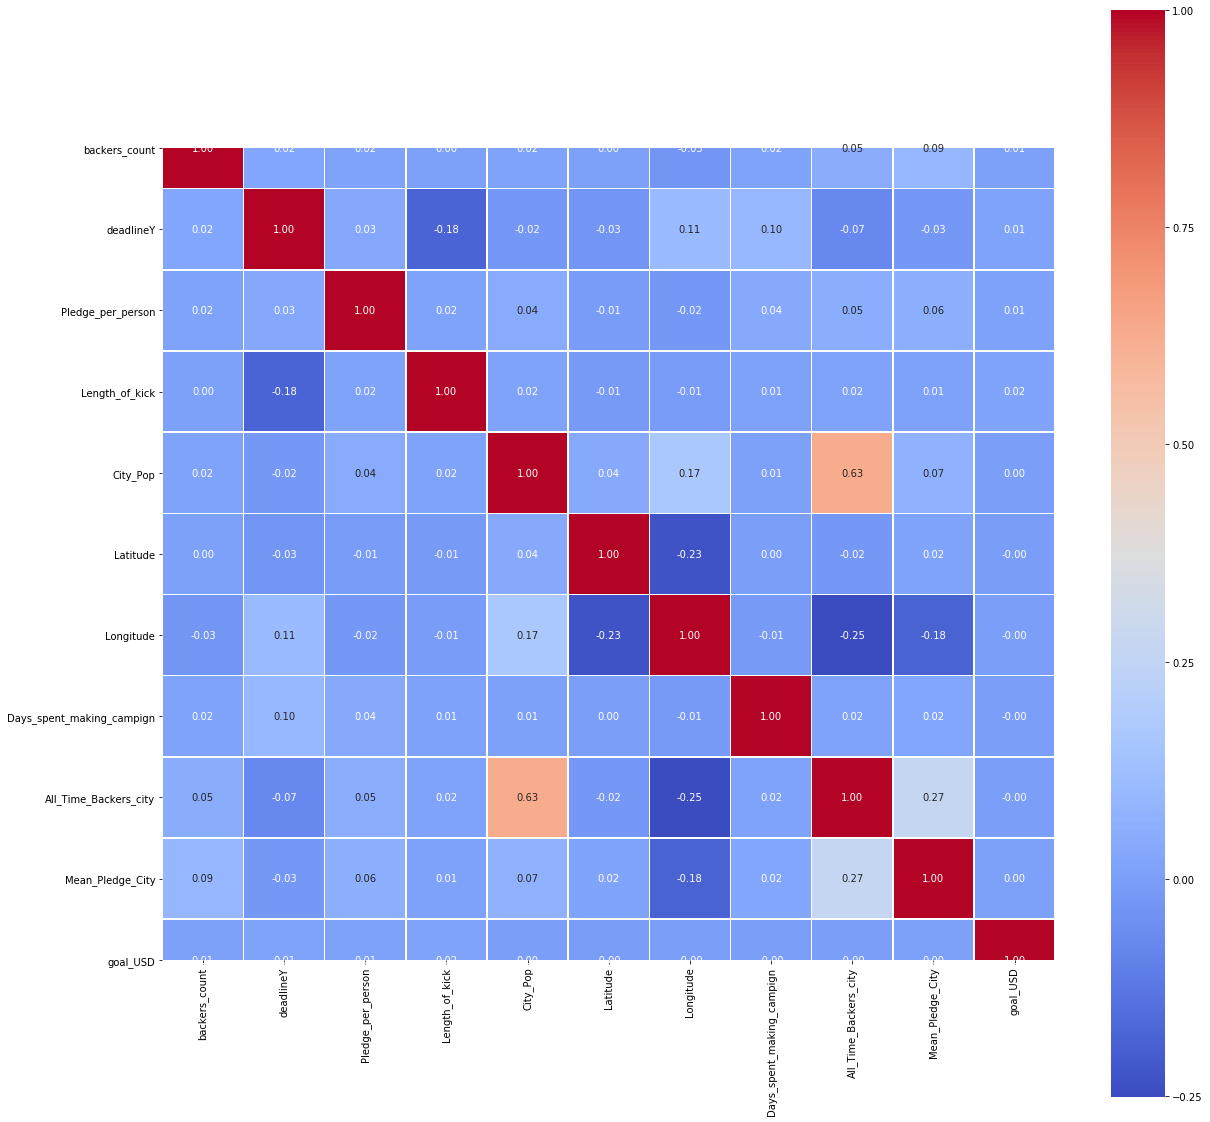

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


plt.figure(figsize=(20, 20)) 
corr1 = data2.corr()
h2 = sns.heatmap(corr1, square=True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm')
plt.savefig("h2.png")

## Scaling features

In [13]:
from sklearn.preprocessing import StandardScaler
data4 = data2
for col in ['backers_count', 'Length_of_kick', 'City_Pop', 'Days_spent_making_campign', 'All_Time_Backers_city', 'goal_USD', 'Pledge_per_person', 'Mean_Pledge_City']:
    sc = StandardScaler(with_mean=True, with_std=True)
    data4[col] = sc.fit_transform(data4[col].values.reshape(-1,1))
data4.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Country,City,name,blurb,status,slug,staff_pick,backers_count,Categories,spotLight,...,Length_of_kick,City_Pop,Latitude,Longitude,County,State,Days_spent_making_campign,All_Time_Backers_city,Mean_Pledge_City,goal_USD
0,101,1011000011,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,1,worlds-and-creatures-the-art-of-anthony-christou,0,0.056609,0,0,...,0.364274,-0.080722,-34.928661,138.598633,111001001,110001,-0.217052,-0.611871,-0.465976,-0.035633
1,101,1011000011,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",0,pheonician-entertainment-productions,0,-0.102810,1110,0,...,0.525872,-0.080722,-34.928661,138.598633,111001001,110001,-0.208668,-0.611871,-0.465976,-0.035051
2,101,1011000011,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,1,the-postnatalist-second-issue-comic-book,1,-0.100533,1110,0,...,0.929867,-0.080722,-34.928661,138.598633,111001001,110001,-0.367961,-0.611871,-0.465976,-0.041106
3,101,1011000011,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,0,alkandros-futurewear-3000-square-sunglasses-be...,0,-0.104328,1,0,...,2.141853,-0.080722,-34.928661,138.598633,111001001,110001,0.311129,-0.611871,-0.465976,-0.035633
5,101,1011000011,E-motive Australia Homemade Rustic Picture Boards,Homemade Rustic Picture Boards with a Snap-on/...,0,e-motive-australia-homemade-rustic-picture-boards,0,-0.105847,1110,0,...,-0.282119,-0.080722,-34.928661,138.598633,111001001,110001,-0.367961,-0.611871,-0.465976,-0.036798


## Generate new features based on 'name' and 'blurb'

In [14]:
data4['len_name'] = data4.name.str.len()
data4['word_name'] = data4.name.apply(lambda w: len(str(w).split(' ')))
#x['exclamation'] = (x.name.str[-1] == '!').astype(int)
#x['question'] = (x.name.str[-1] == '?').astype(int)
data4['word_name_radio'] = data4.word_name / data4.len_name

data4['len_blurb'] = data4.blurb.str.len()
data4['word_blurb'] = data4.blurb.apply(lambda w: len(str(w).split(' ')))
#x['exclamation'] = (x.name.str[-1] == '!').astype(int)
#x['question'] = (x.name.str[-1] == '?').astype(int)
data4['word_blurb_radio'] = data4.word_blurb / data4.len_blurb

data5 = data4.drop(['name','blurb'], axis = 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [15]:
data5.head()

,Country,City,status,slug,staff_pick,backers_count,Categories,spotLight,deadlineY,Pledge_per_person,...,Days_spent_making_campign,All_Time_Backers_city,Mean_Pledge_City,goal_USD,len_name,word_name,word_name_radio,len_blurb,word_blurb,word_blurb_radio
0,101,1011000011,1,worlds-and-creatures-the-art-of-anthony-christou,0,0.056609,0,0,17,-0.133898,...,-0.217052,-0.611871,-0.465976,-0.035633,47,8,0.170213,134,25,0.186567
1,101,1011000011,0,pheonician-entertainment-productions,0,-0.102810,1110,0,17,-0.262599,...,-0.208668,-0.611871,-0.465976,-0.035051,36,3,0.083333,133,24,0.180451
2,101,1011000011,1,the-postnatalist-second-issue-comic-book,1,-0.100533,1110,0,15,-0.308022,...,-0.367961,-0.611871,-0.465976,-0.041106,42,7,0.166667,135,17,0.125926
3,101,1011000011,0,alkandros-futurewear-3000-square-sunglasses-be...,0,-0.104328,1,0,17,-0.383729,...,0.311129,-0.611871,-0.465976,-0.035633,58,7,0.120690,127,20,0.157480
5,101,1011000011,0,e-motive-australia-homemade-rustic-picture-boards,0,-0.105847,1110,0,14,-0.527570,...,-0.367961,-0.611871,-0.465976,-0.036798,49,6,0.122449,113,16,0.141593


## Divide dataset into X and Y

In [16]:
X = data5.drop(['slug', 'status'], axis = 1)
Y = data5.status

In [17]:
X.shape

(72033, 24)

## Divide X into training dataset and test dataset

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

## Use SVM model

In [19]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

rbf_classifier = SVC()
rbf_classifier.fit(X_train, y_train)

Y_pred1 = rbf_classifier.predict(X_test)

print('SVM classification report \n',classification_report(y_test, Y_pred1))
print('SVM confusion_matrix \n',confusion_matrix(y_test, Y_pred1),'\n')
print('SVM accuracy is', accuracy_score(Y_pred1, y_test))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM classification report 
               precision    recall  f1-score   support

           0       0.50      0.22      0.31      8862
           1       0.51      0.79      0.62      9147

    accuracy                           0.51     18009
   macro avg       0.51      0.50      0.46     18009
weighted avg       0.51      0.51      0.47     18009

SVM confusion_matrix 
 [[1988 6874]
 [1961 7186]] 

SVM accuracy is 0.5094119606863236


## Use MLPNN model

In [20]:
from sklearn.neural_network import MLPClassifier

MLPNN = MLPClassifier(learning_rate = 'adaptive', max_iter = 1000, verbose = False)
MLPNN.fit(X_train, y_train)

Y_pred2 = MLPNN.predict(X_test)

print(classification_report(y_test, Y_pred2))
print(confusion_matrix(y_test, Y_pred2))
print('accuracy of MLPNN:', accuracy_score(y_test, Y_pred2))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8862
           1       0.51      1.00      0.67      9147

    accuracy                           0.51     18009
   macro avg       0.25      0.50      0.34     18009
weighted avg       0.26      0.51      0.34     18009

[[   0 8862]
 [   0 9147]]
accuracy of MLPNN: 0.5079127103115109


## Use KNN model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

neighbors = int(sqrt(X_train.shape[0] / 2))
KNN = KNeighborsClassifier(n_neighbors=neighbors)
KNN.fit(X_train, y_train)

Y_pred = KNN.predict(X_test)
    
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))
print('accuracy of KNN:', accuracy_score(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.55      0.57      8862
           1       0.59      0.62      0.60      9147

    accuracy                           0.58     18009
   macro avg       0.58      0.58      0.58     18009
weighted avg       0.58      0.58      0.58     18009

[[4893 3969]
 [3506 5641]]
accuracy of KNN: 0.5849297573435505


## Use Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

Y_pred = DT.predict(X_test)
    
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))
print('accuracy of DT:', accuracy_score(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8862
           1       0.98      0.98      0.98      9147

    accuracy                           0.98     18009
   macro avg       0.98      0.98      0.98     18009
weighted avg       0.98      0.98      0.98     18009

[[8703  159]
 [ 150 8997]]
accuracy of DT: 0.9828419123771448


## Regression System

In [23]:
data6 = data.drop(['Unnamed: 0', 'X1', 'X1_1', 'disable_communication', 'currency', 'currency_symbol', 'currency_trailing_code', 'id','deadline', 'state_changed_at', 'created_at','launched_at', 'pledged', 'Prct_goal', 'Backers_as_Prct_of_Pop', 'Backers_as_Prct_of_Pop_YM', 'Backers_as_Prct_of_Pop_Y', 'Days_inception_to_Deadline','deadlineTime','state_changed_atTime', 'created_atTime', 'launched_atTime',
       'state_changed_atY', 'created_atY', 'launched_atY', 'deadlineYM', 'state_changed_atYM', 'created_atYM', 'launched_atYM', 'Mean_pledge_city_Y', 'Mean_pledge_city_YM', 'Backers_in_city_YM', 'Backers_in_city_Y'], axis = 1)

In [24]:
data6['goal_USD'] = data6['goal'] / data6['Ex_USd']

data6 = data6.drop(['goal', 'Ex_USd'], axis = 1)

In [25]:
data6.columns

Index(['Country', 'City', 'name', 'blurb', 'status', 'slug', 'staff_pick',
       'backers_count', 'Categories', 'spotLight', 'pledgedUSD', 'deadlineY',
       'Pledge_per_person', 'Length_of_kick', 'City_Pop', 'Latitude',
       'Longitude', 'County', 'State', 'Days_spent_making_campign',
       'All_Time_Backers_city', 'Mean_Pledge_City', 'goal_USD'],
      dtype='object')

In [26]:
data6.query("status in ['failed', 'successful']", inplace=True)

In [27]:
def handle_non_numerical_data1(df):
    columns = ['Country', 'City', 'County', 'State', 'status', 'Categories', 'spotLight', 'staff_pick']
    
    #text_digit_vals = {}

    for column in columns:
        #print df[column].values
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = bin(x)[2:]
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
  
    return df

In [28]:
import numpy as np

data7 = handle_non_numerical_data1(data6)

In [29]:
data8 = data7.dropna(axis = 0)
data8.head()

,Country,City,name,blurb,status,slug,staff_pick,backers_count,Categories,spotLight,...,Length_of_kick,City_Pop,Latitude,Longitude,County,State,Days_spent_making_campign,All_Time_Backers_city,Mean_Pledge_City,goal_USD
0,101,1011000011,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,1,worlds-and-creatures-the-art-of-anthony-christou,0,215,0,0,...,38,1074168,-34.928661,138.598633,111001001,110001,21,1672,3124.0,3716.880800
1,101,1011000011,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",0,pheonician-entertainment-productions,0,5,1110,0,...,40,1074168,-34.928661,138.598633,111001001,110001,22,1672,3124.0,4088.568881
2,101,1011000011,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,1,the-postnatalist-second-issue-comic-book,1,8,1110,0,...,45,1074168,-34.928661,138.598633,111001001,110001,3,1672,3124.0,223.012848
3,101,1011000011,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,0,alkandros-futurewear-3000-square-sunglasses-be...,0,3,1,0,...,60,1074168,-34.928661,138.598633,111001001,110001,84,1672,3124.0,3716.880800
5,101,1011000011,E-motive Australia Homemade Rustic Picture Boards,Homemade Rustic Picture Boards with a Snap-on/...,0,e-motive-australia-homemade-rustic-picture-boards,0,1,1110,0,...,30,1074168,-34.928661,138.598633,111001001,110001,3,1672,3124.0,2973.504640


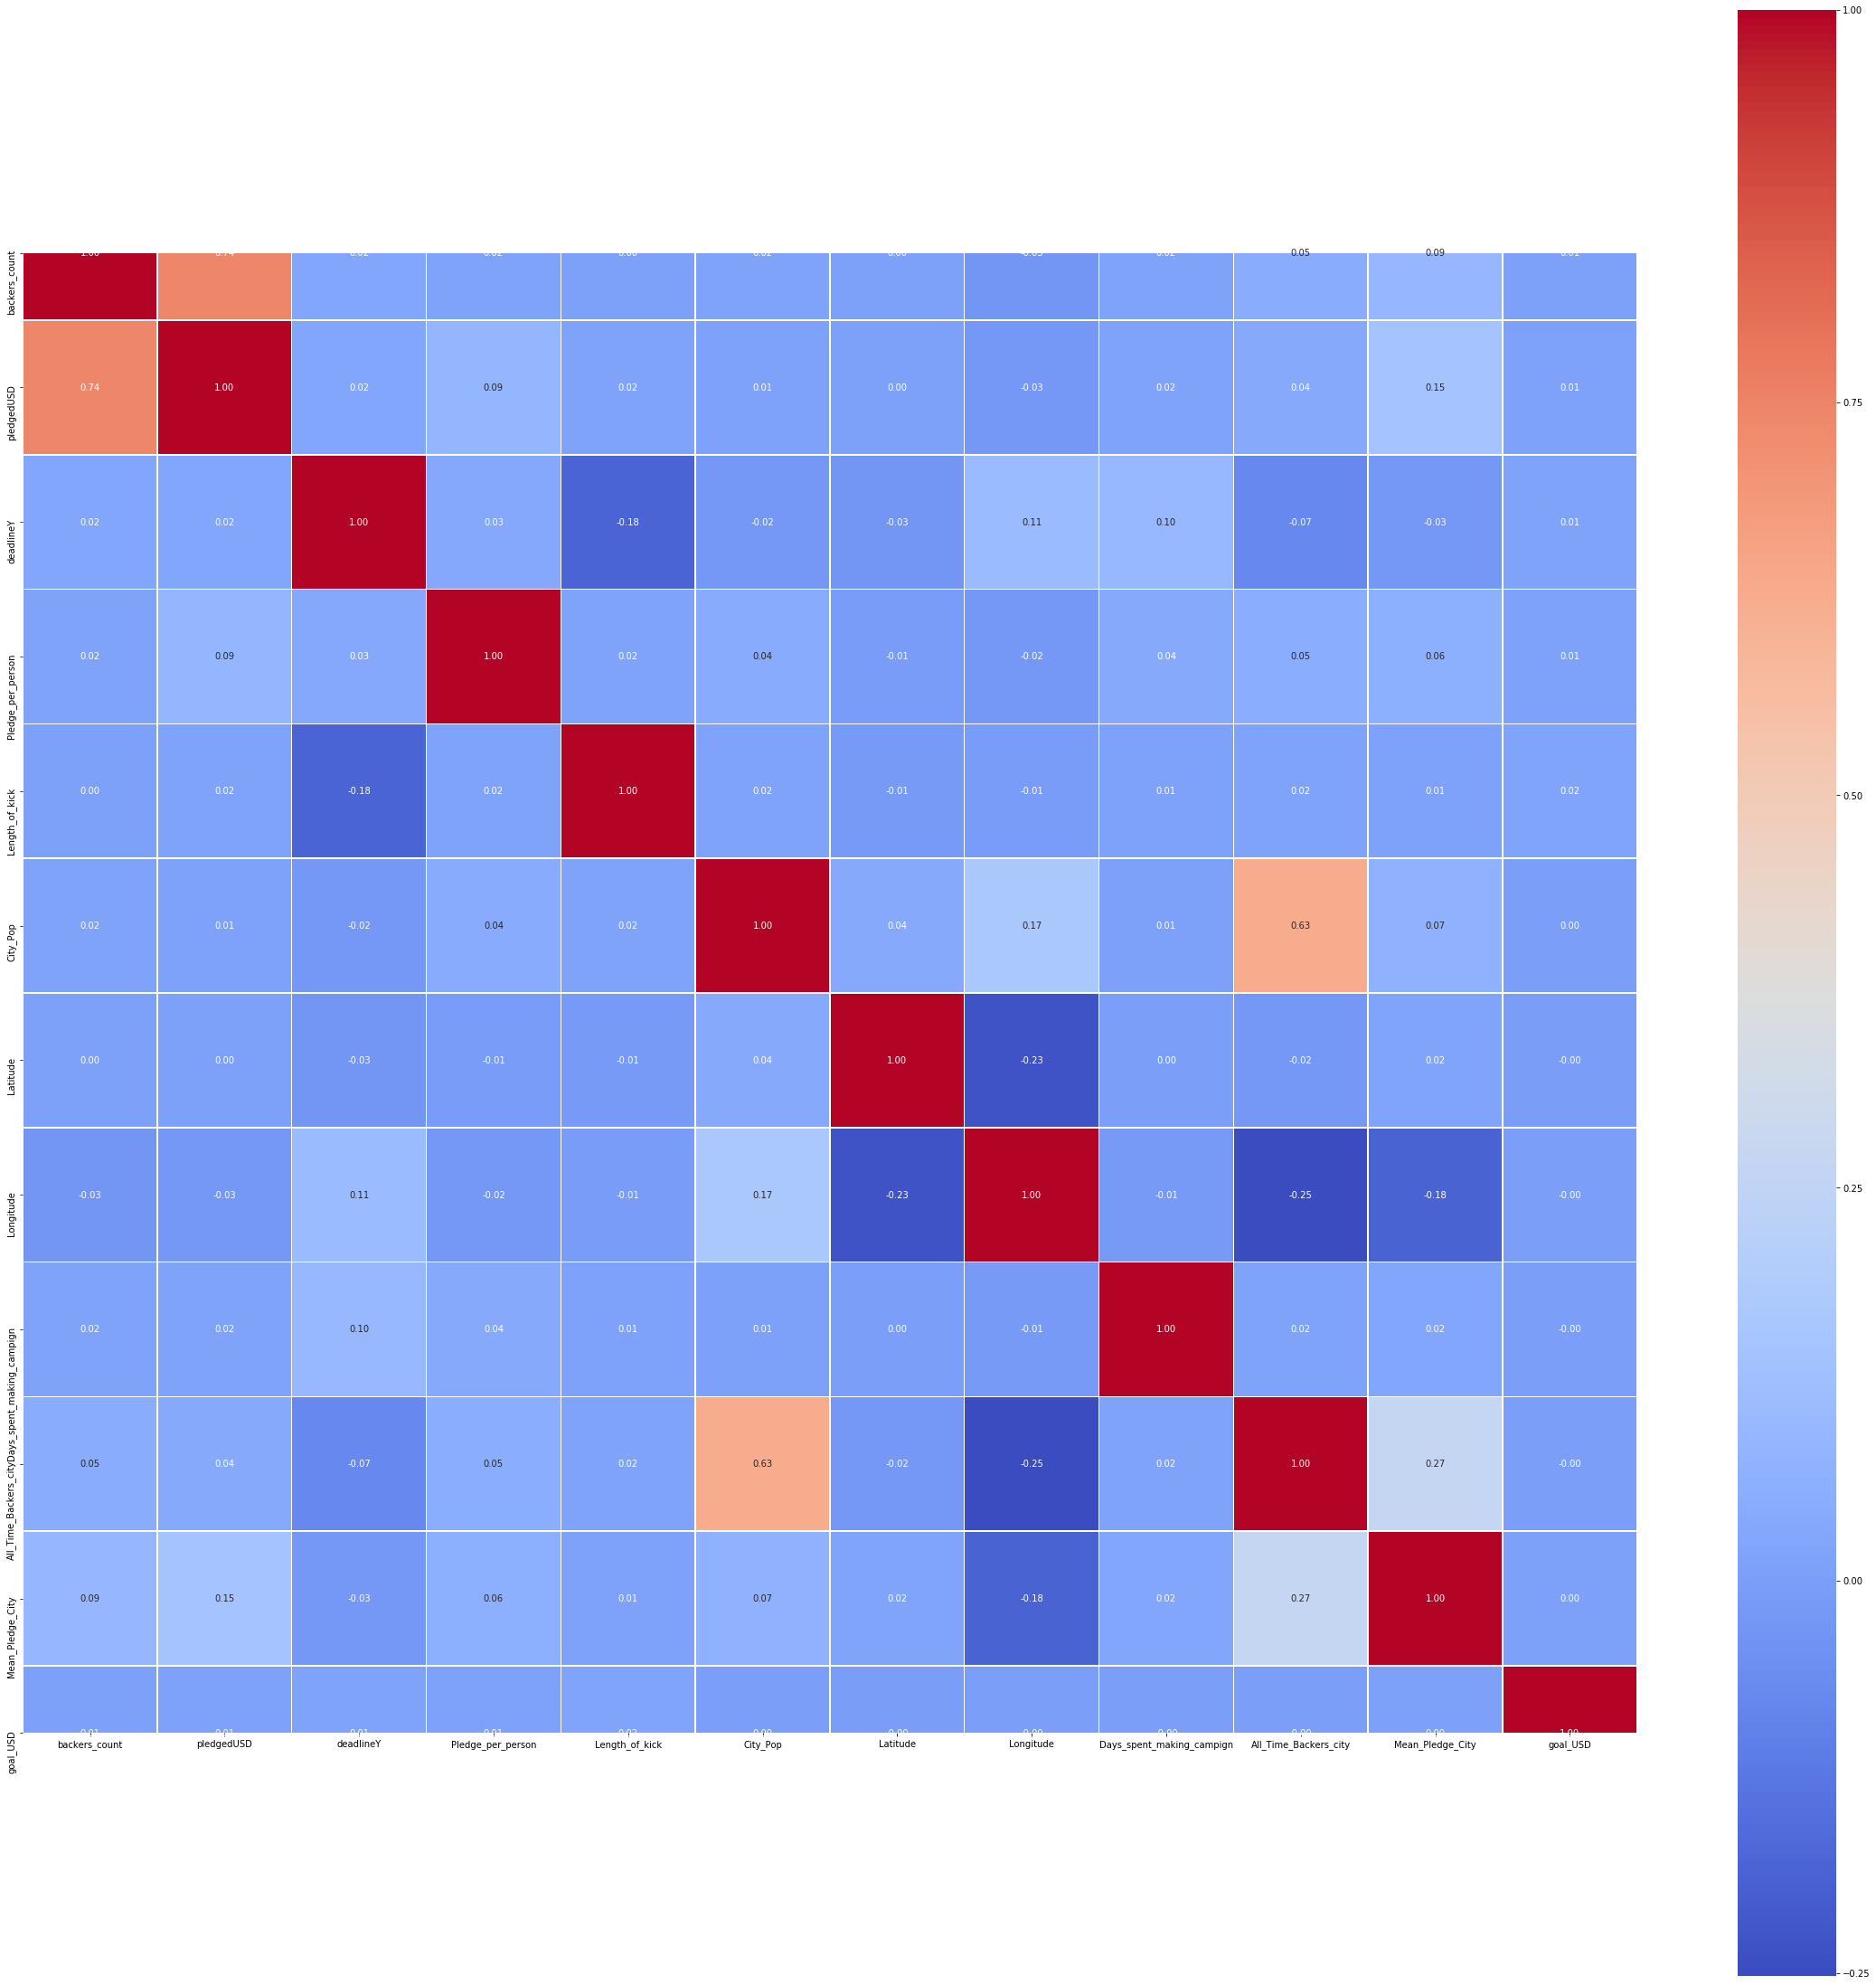

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


plt.figure(figsize=(40, 40)) 
corr3 = data8.corr()
h3 = sns.heatmap(corr3, square=True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm')
plt.savefig("h3.png")

In [31]:
from sklearn.preprocessing import StandardScaler
data10 = data8
for col in ['backers_count', 'Length_of_kick', 'pledgedUSD', 'Pledge_per_person', 'City_Pop', 'Days_spent_making_campign', 'All_Time_Backers_city', 'Mean_Pledge_City', 'goal_USD']:
    sc1 = StandardScaler(with_mean=True, with_std=True)
    data10[col] = sc1.fit_transform(data10[col].values.reshape(-1,1))
data10.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Country,City,name,blurb,status,slug,staff_pick,backers_count,Categories,spotLight,...,Length_of_kick,City_Pop,Latitude,Longitude,County,State,Days_spent_making_campign,All_Time_Backers_city,Mean_Pledge_City,goal_USD
0,101,1011000011,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,1,worlds-and-creatures-the-art-of-anthony-christou,0,0.056609,0,0,...,0.364274,-0.080722,-34.928661,138.598633,111001001,110001,-0.217052,-0.611871,-0.465976,-0.035633
1,101,1011000011,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",0,pheonician-entertainment-productions,0,-0.102810,1110,0,...,0.525872,-0.080722,-34.928661,138.598633,111001001,110001,-0.208668,-0.611871,-0.465976,-0.035051
2,101,1011000011,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,1,the-postnatalist-second-issue-comic-book,1,-0.100533,1110,0,...,0.929867,-0.080722,-34.928661,138.598633,111001001,110001,-0.367961,-0.611871,-0.465976,-0.041106
3,101,1011000011,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,0,alkandros-futurewear-3000-square-sunglasses-be...,0,-0.104328,1,0,...,2.141853,-0.080722,-34.928661,138.598633,111001001,110001,0.311129,-0.611871,-0.465976,-0.035633
5,101,1011000011,E-motive Australia Homemade Rustic Picture Boards,Homemade Rustic Picture Boards with a Snap-on/...,0,e-motive-australia-homemade-rustic-picture-boards,0,-0.105847,1110,0,...,-0.282119,-0.080722,-34.928661,138.598633,111001001,110001,-0.367961,-0.611871,-0.465976,-0.036798


In [32]:
data10['len_name'] = data10.name.str.len()
data10['word_name'] = data10.name.apply(lambda w: len(str(w).split(' ')))
#x['exclamation'] = (x.name.str[-1] == '!').astype(int)
#x['question'] = (x.name.str[-1] == '?').astype(int)
data10['word_name_radio'] = data10.word_name / data10.len_name

data10['len_blurb'] = data10.blurb.str.len()
data10['word_blurb'] = data10.blurb.apply(lambda w: len(str(w).split(' ')))
#x['exclamation'] = (x.name.str[-1] == '!').astype(int)
#x['question'] = (x.name.str[-1] == '?').astype(int)
data10['word_blurb_radio'] = data10.word_blurb / data10.len_blurb

data11 = data10.drop(['name','blurb'], axis = 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [33]:
X = data11.drop(['slug', 'pledgedUSD'], axis = 1)
Y = data11.pledgedUSD

In [34]:
X.shape

(72033, 25)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

## Use KNN Regression

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

neighbor = int(sqrt(X.shape[0] / 2))
KNNR = KNeighborsRegressor(n_neighbors=neighbor)
T = np.linspace(0, X_test.shape[0], X_test.shape[0])[:, np.newaxis]
KNNR.fit(X_train, y_train)

Y_pred4 = KNNR.predict(X_test)

In [53]:
rss=((y_test-Y_pred4)**2).sum()
mse=np.mean((y_test-Y_pred4)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-Y_pred4)**2)))
print("Final mse value is =", mse)

Final rmse value is = 0.49238498987935636
Final mse value is = 0.24244297825849387


## Use Multi-layer Perceptron Regressor

In [54]:
from sklearn.neural_network import MLPRegressor

MLPR = MLPRegressor(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
MLPR.fit(X_train, y_train)

Y_pred5 = MLPR.predict(X_test)

In [55]:
rss=((y_test-Y_pred5)**2).sum()
mse=np.mean((y_test-Y_pred5)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-Y_pred5)**2)))
print("Final mse value is =", mse)

Final rmse value is = 0.4994591341480117
Final mse value is = 0.24945942668388152


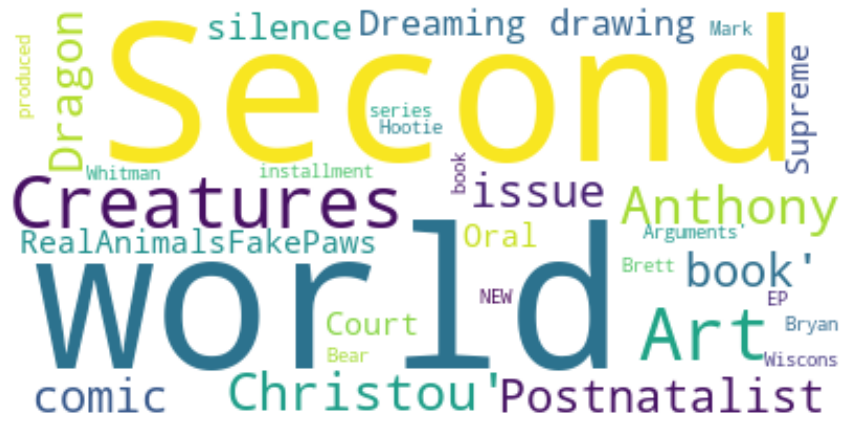

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

successful_name = data[data.status == 'successful']['name'].values
wordcloud = WordCloud(background_color='white').generate(str(successful_name))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

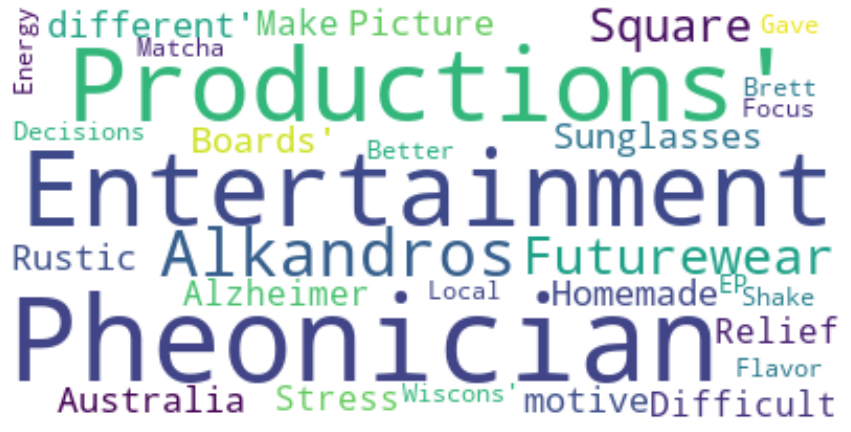

In [41]:
failure_name = data[data.status == 'failed']['name'].values
wordcloud1 = WordCloud(background_color='white').generate(str(failure_name))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()